In [1]:
from __future__ import print_function, division
from builtins import range, input

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [3]:
def softplus(x):
    # log1p(x) = log(1+x)
    return np.log1p(np.exp(x))

In [4]:
# NN with layer size(4, 3, 2)
W1 = np.random.randn(4,3)
# we need 2 component for the mean 2 component for the standard deviation
# hence 2 * 2
W2 = np.random.randn(3, 2*2)

In [5]:
#ignoring bias for simplicity
def forward(x, W1, W2):
    hidden = np.tanh(x.dot(W1))
    output = hidden.dot(W2) # no activation
    mean = output[:2]
    stddev = softplus(output[2:])
    return mean, stddev

In [7]:
# make random input
x = np.random.randn(4)

In [8]:
# get the parameters of the Gaussian
mean, stddev = forward(x, W1, W2)
print("mean:", mean)
print("stddev:", stddev)

mean: [-0.23299747  1.55322517]
stddev: [1.80025781 0.5892261 ]


In [9]:
# draw samples
samples = mvn.rvs(mean=mean, cov=stddev**2, size=10000)

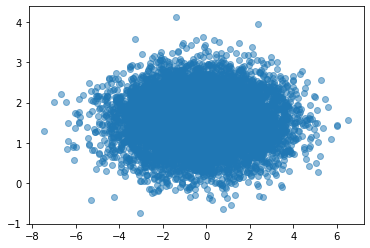

In [11]:
# plot the samples
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.show()